In [1]:
import pandas as pd
import numpy as np
from apyori import apriori as declat


In [2]:
import re
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import spacy

In [3]:
def print_plt(wordcloud):
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [4]:
import pandas as pd
import glob
import os

files = []
path = "C:/Users/Semih/PycharmProjects/firstProjectEver/eclat/Apriori-Eclat-master/mixed/long/1600/" # use your path
all_files = os.listdir(path)
 
for x in all_files:
    if x.endswith("long-tweets.csv"):
        files.append(x)

In [5]:
files[0]

'10_FIFAWWC_long-tweets.csv'

In [6]:
li = []

for filename in files:
    df = pd.read_csv(path+filename, index_col=None, header=0)
    df["owner"] = str(filename[:-16]) #[2:-11] for short
    li.append(df)

dataset = pd.concat(li, axis=0, ignore_index=True)

In [7]:
dataset.head(3)

,name,text,owner
0,1604811155083599873,Next up: #FIFAWWC 2023! 😁\r\n\r\nSee ya there!...,10_FIFAWWC
1,1604551472301195266,Ps. Can't wait for the #FIFAWWC 2023 now! 🤩,10_FIFAWWC
2,1604551016967446529,#FIFAWorldCup Champions! 🔥 \r\n\r\nCongratulat...,10_FIFAWWC


In [8]:
dataset.shape

(1600, 3)

In [9]:
del dataset["name"]

In [10]:
dataset.head()

,text,owner
0,Next up: #FIFAWWC 2023! 😁\r\n\r\nSee ya there!...,10_FIFAWWC
1,Ps. Can't wait for the #FIFAWWC 2023 now! 🤩,10_FIFAWWC
2,#FIFAWorldCup Champions! 🔥 \r\n\r\nCongratulat...,10_FIFAWWC
3,That trophy lift feeling! 😍\r\n\r\nWho will be...,10_FIFAWWC
4,RT @FIFAWWC: Who's going to win the #FIFAWorld...,10_FIFAWWC


In [11]:
dataset["text"][0]

'Next up: #FIFAWWC 2023! 😁\r\n\r\nSee ya there! 👋 #BeyondGreatness'

In [12]:
import en_core_web_sm
nlp = en_core_web_sm.load()

def clean_string(text, stem="None"):

    final_string = ""

    # Make lower
    text = text.lower()

    # Remove line breaks
    text = re.sub(r'\n', '', text)
    # Remove - 
    text = re.sub(r'– ', ' ', text)
    text = re.sub(r'—', '', text)

    # Remove puncuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Remove stop words
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']

    text_filtered = [word for word in text if not word in useless_words]

    # Remove numbers
    text_filtered = [re.sub(r'\w*\d\w*', '', w) for w in text_filtered]

    # Stem or Lemmatize
    if stem == 'Stem':
        stemmer = PorterStemmer() 
        text_stemmed = [stemmer.stem(y) for y in text_filtered]
    elif stem == 'Lem':
        lem = WordNetLemmatizer()
        text_stemmed = [lem.lemmatize(y) for y in text_filtered]
    elif stem == 'Spacy':
        text_filtered = nlp(' '.join(text_filtered))
        text_stemmed = [y.lemma_ for y in text_filtered]
    else:
        text_stemmed = text_filtered

    final_string = ' '.join(text_stemmed)

    return final_string

In [13]:
clean_string(str(dataset["text"][0]))

'next fifawwc  😁 see ya 👋 beyondgreatness'

In [14]:
for x in range(len(dataset)):
    dataset["text"][x] = clean_string(str(dataset["text"][x]))

In [15]:
dataset

,text,owner
0,next fifawwc 😁 see ya 👋 beyondgreatness,10_FIFAWWC
1,ps cant wait fifawwc 🤩,10_FIFAWWC
2,fifaworldcup champions 🔥 congratulations argen...,10_FIFAWWC
3,trophy lift feeling 😍 crowned fifaworldcup cha...,10_FIFAWWC
4,rt fifawwc whos going win fifaworldcup final 👀,10_FIFAWWC
...,...,...
1595,full time 🇶🇦 qatar netherlands 🇳🇱 alannabi f...,9_QFA_EN
1596,📸 photos game qatar netherlands fifaworldcup ...,9_QFA_EN
1597,📢 second half begins 🇶🇦 qatar netherlands 🇳🇱 ...,9_QFA_EN
1598,📢 halftime 🇶🇦 qatar netherlands 🇳🇱 alannabi ...,9_QFA_EN


In [16]:
length_of_the_messages = dataset['text'].str.split("\\s+")
max_word = length_of_the_messages.str.len().max()
print("Max number of words = ", max_word)


Max number of words =  24


In [17]:
words = pd.DataFrame(index=np.arange(1), columns=np.arange(max_word))
words = words.iloc[1: , :]

In [18]:
for x in dataset["text"]:
    mylist = str(x).split()
    new = mylist
    words = words.append(pd.Series(new, index=words.columns[:len(new)]), ignore_index=True)

c:\users\semih\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [19]:
words.head(3)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,next,fifawwc,😁,see,ya,👋,beyondgreatness,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ps,cant,wait,fifawwc,🤩,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,fifaworldcup,champions,🔥,congratulations,argentina,👏,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
words.shape

(1600, 24)

In [44]:
transactions=[]
for i in range(0,words.shape[0]):
    transactions.append([str(words.values[i,j]) for j in range(0,words.shape[1])])

## Training the Eclat model

In [92]:
rules=declat(transactions,min_support=0.0025,min_confidence=0.01,min_lift=3,min_length=2,max_length=2)
results=list(rules)
print(len(results))

494


In [71]:
lhs,rhs,support=[],[],[]
for result in results:
    lhs.append(tuple(result[2][0][0])[0])
    rhs.append(tuple(result[2][0][1])[0])
    support.append(result[1])

List of observed rules can be seen below:

In [72]:
columns=list(zip(lhs,rhs,support))

In [73]:
columns[:5]

[('abecel', 'cinchprem', 0.004375),
 ('abecel', 'coybig🍀', 0.00375),
 ('acoustic', 'rt', 0.0025),
 ('adidas', 'rt', 0.003125),
 ('afc', 'arsenal', 0.0025)]

In [74]:
result_df=pd.DataFrame(columns)
result_df.columns=['Item1','Item2','Support']
result_df

,Item1,Item2,Support
0,abecel,cinchprem,0.004375
1,abecel,coybig🍀,0.003750
2,acoustic,rt,0.002500
3,adidas,rt,0.003125
4,afc,arsenal,0.002500
...,...,...,...
489,𝗙𝗿𝗼𝗺𝗣𝗮𝗿𝗶𝘀𝗧𝗼𝗤𝗮𝘁𝗮𝗿,🏆,0.004375
490,🇦🇷,🇫🇷,0.006250
491,🇦🇷,🏆,0.002500
492,🇦🇷️⃣🆚️⃣🇫🇷,🏆,0.002500


In [93]:
type(result_df.values[108][0])

str

Sorting the relations by their support

In [39]:
result_df=result_df.sort_values('Support',ascending=False)


In [40]:
result_df.values[100]

array(['france', '🇫🇷', 0.004375], dtype=object)

In [41]:
result_df.values[0:25]

array([['cup', 'world', 0.02875],
       ['globeandmail', 'rt', 0.0125],
       ['ig', '📸', 0.01125],
       ['luxury', 'travel', 0.01125],
       ['lionel', 'messi', 0.01125],
       ['argentina', 'fifaworldcup', 0.01125],
       ['blog', 'luxury', 0.010625],
       ['blog', 'travel', 0.010625],
       ['argentina', 'world', 0.010625],
       ['argentina', 'cup', 0.009375],
       ['argentina', 'messi', 0.009375],
       ['cup', 'final', 0.009375],
       ['final', 'world', 0.00875],
       ['messi', 'world', 0.008125],
       ['fifa', 'world', 0.008125],
       ['fifaworldcup', 'final', 0.008125],
       ['check', 'official', 0.0075],
       ['via', 'youtubeindia', 0.0075],
       ['congratulations', 'fifaworldcup', 0.0075],
       ['cup', 'fifa', 0.0075],
       ['luxury', 'luxurytravel', 0.0075],
       ['musk', 'twitter', 0.006875],
       ['elon', 'twitter', 0.006875],
       ['blog', 'luxurytravel', 0.006875],
       ['luxurytravel', 'travel', 0.006875]], dtype=object)

In [42]:
from copy import deepcopy
from fcapy.context import FormalContext
from fcapy.visualizer import LineVizNx
import pandas as pd
from fcapy.context import FormalContext
import matplotlib.pyplot as plt
from fcapy.visualizer import LineVizNx
from fcapy.lattice import ConceptLattice

In [149]:
# import pandas as pd

# data = {"Norma": [["apple","inc"], ["apple","inc"], ["apple","inc"], ["apple","inc"]], "Normb": [["apple"], ["amazon"], ["apple","inc"], ["Tesla"]]}

# d = {'col1': [1, 2], 'col2': [3, 4]}

# df = pd.DataFrame(data=data)
# df["result"] = df.apply(lambda x: list(set(x['Norma'])&set(x['Normb'])), axis=1)

In [162]:
# lattice_diff = result_df[0:50]
# del lattice_diff["Support"]

In [163]:
# lattice_diff

,Item1,Item2
92,cup,world
132,globeandmail,rt
154,ig,📸
180,luxury,travel
173,lionel,messi
36,argentina,fifaworldcup
61,blog,luxury
63,blog,travel
43,argentina,world
34,argentina,cup


In [164]:
# lattice_diff_list = lattice_diff.Item2.values.tolist()


In [320]:
lattice_df = result_df[0:50]
lattice_df[0:25]

,Item1,Item2,Support
92,cup,world,0.028750
132,globeandmail,rt,0.012500
154,ig,📸,0.011250
180,luxury,travel,0.011250
173,lionel,messi,0.011250
36,argentina,fifaworldcup,0.011250
61,blog,luxury,0.010625
63,blog,travel,0.010625
43,argentina,world,0.010625
34,argentina,cup,0.009375


In [327]:
lattice_df[lattice_df["Item2"] == "champions"]

,Item1,Item2,Support
32,argentina,champions,0.00625


In [314]:
lattice_df = lattice_df.set_index(list(lattice_df)[0])
lattice_df2 = lattice_df.pivot(columns='Item2')["Support"]
lattice_df2[lattice_df2.notnull()] = True
lattice_df2.fillna(False,inplace=True)

In [317]:
lattice_df2

Item2,champions,check,cup,fifa,fifaworldcup,final,happy,lionel,listen,luxury,...,tech,teen,travel,twitter,world,youtubeindia,🇦🇷,🇫🇷,🏆,📸
Item1,,,,,,,,,,,,,,,,,,,,,
allmusic,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
amp,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
argentina,True,False,True,False,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
blog,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
champions,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
check,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
cup,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
elon,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
fifaworldcup,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [316]:
x = 0
while x < (len(lattice_df2)):
    try:
        if(lattice_df2.values[x].sum()) == 1:
           lattice_df2 = lattice_df2.drop(lattice_df2.index[x])
        else:
            x = x+1
    except:
        pass


In [318]:
K = FormalContext.from_pandas(lattice_df2)

# Create the concept lattice
L = ConceptLattice.from_context(K)

Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(4, 11): frozenset({5})}
C:\Users\Semih\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127462 (\N{REGIONAL INDICATOR SYMBOL LETTER A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Semih\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Semih\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


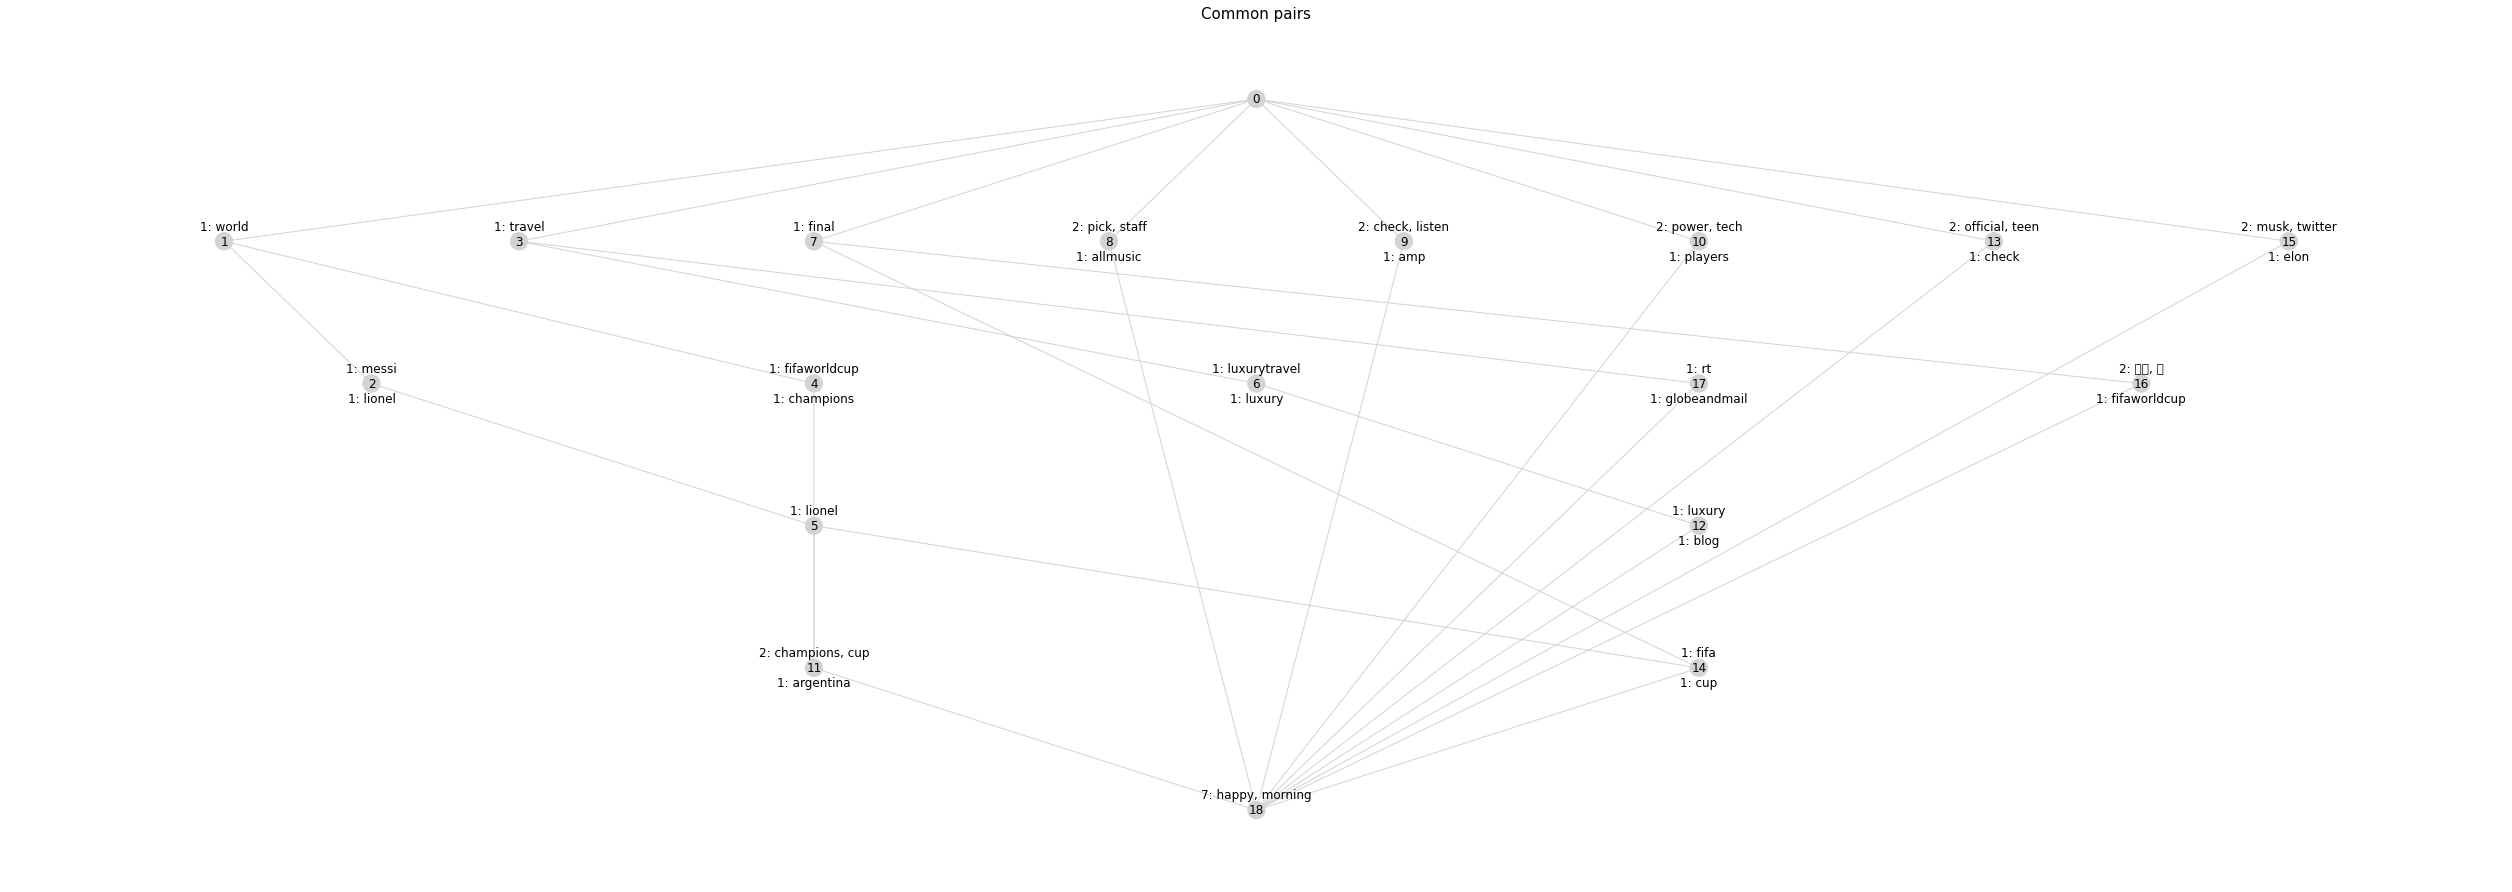

In [319]:

fig, ax = plt.subplots(figsize=(35, 12.5))
vsl = LineVizNx()
vsl.draw_concept_lattice(L, ax=ax, flg_node_indices=True)
ax.set_title('Common pairs', fontsize=15)
plt.tight_layout()
plt.show()

In [145]:
acc = pd.read_csv("C:/Users/Semih/PycharmProjects/firstProjectEver/Company/users.csv",sep=",", encoding="ISO-8859-1")

In [147]:
related = []
for x in range(len(dataset)):
    Line = dataset["text"][x]
    matches = ["cup", "world"]
    if all(y in Line for y in matches):
        related.append(str(dataset["owner"][x]))
result = [] 
for i in related: 
    if i not in result: 
        result.append(i)
print(result)

['10_FIFAWWC', '11_juventusfcen', '12_PSG_English', '13_LaLigaEN', '14_FCBarcelona', '15_ChampionsLeague', '16_premierleague', '17_realmadriden', '18_Fenerbahce_EN', '19_beINSPORTS_EN', '1_FIFAcom', '20_Galatasaray', '31_GoTravelClub_en', '35_WorldTourisms', '3_SkyFootball', '4_skworldfootball', '58_Improbableio', '5_Football_LDN', '7_ManUtd', '8_CelticFC', '9_QFA_EN']


In [148]:
compare = pd.DataFrame(result,columns =["Account name"])
compare["Predicted"] = "Football"
compare["Actual"] = ""

In [91]:
for x in range(len(compare)):
    y = compare["Account name"][x].split("_",1)[1]
    z = acc.loc[acc['Account'] == y, 'Category'].iloc[0]
    compare["Actual"][x] = z

In [92]:
compare

,Account name,Predicted,Actual
0,10_FIFAWWC,Football,Football
1,11_juventusfcen,Football,Football
2,12_PSG_English,Football,Football
3,13_LaLigaEN,Football,Football
4,14_FCBarcelona,Football,Football
5,15_ChampionsLeague,Football,Football
6,16_premierleague,Football,Football
7,17_realmadriden,Football,Football
8,18_Fenerbahce_EN,Football,Football
9,19_beINSPORTS_EN,Football,Football


In [104]:
rate = (compare.Predicted==compare.Actual).mean()
print("Accuracy rate %.2f%%"%(rate*100))


Accuracy rate 85.71%


In [52]:
related = []
for x in range(len(dataset)):
    Line = dataset["text"][x]
    matches = ["inspiring","vision"]
    if any(y in Line for y in matches):
        related.append(str(dataset["owner"][x]))
result = [] 
for i in related: 
    if i not in result: 
        result.append(i)
print(result)

['25_TTGMedia', '29_CNNTravel', '30_BBC_Travel', '40_tgamtravel', '42_TechnicalGuruji', '56_TVTechnology', '67_MarvelMusicInc', '75_MelloMusicGroup']


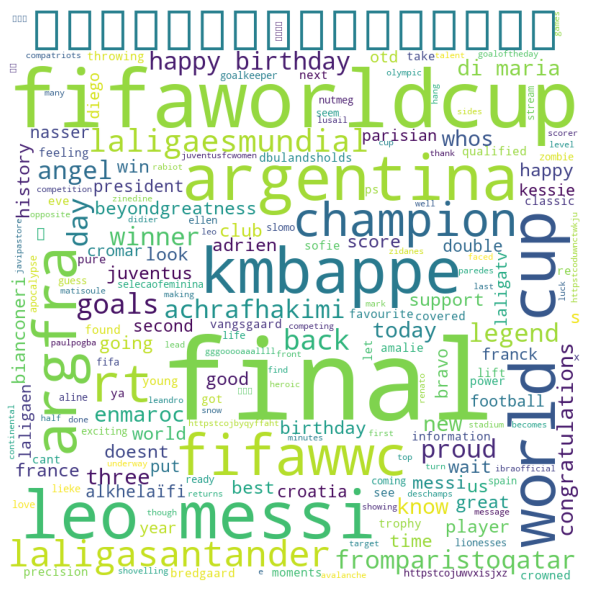

In [53]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
 
comment_words = ''
stopwords = set(STOPWORDS)
 
for val in transactions:
    for wrd in val:  
        if wrd != "nan":
            comment_words += "".join(wrd)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
print_plt(wordcloud)

In [54]:
duos_df = result_df

In [55]:
duos_df["combined"] = duos_df["Item1"] +" "+ duos_df["Item2"]
del duos_df["Item1"] 
del duos_df["Item2"] 

In [56]:
duos_list = duos_df.reset_index()[['combined', 'Support']].values.tolist()


In [57]:
duos_list_20 = duos_list[0:20]
dict_20 = {}

for l2 in duos_list_20:
    dict_20[l2[0]] = l2[1]

In [58]:
wordcloud = WordCloud(width = 800, height = 800,background_color ='white',collocations=False).generate_from_frequencies(dict_20)

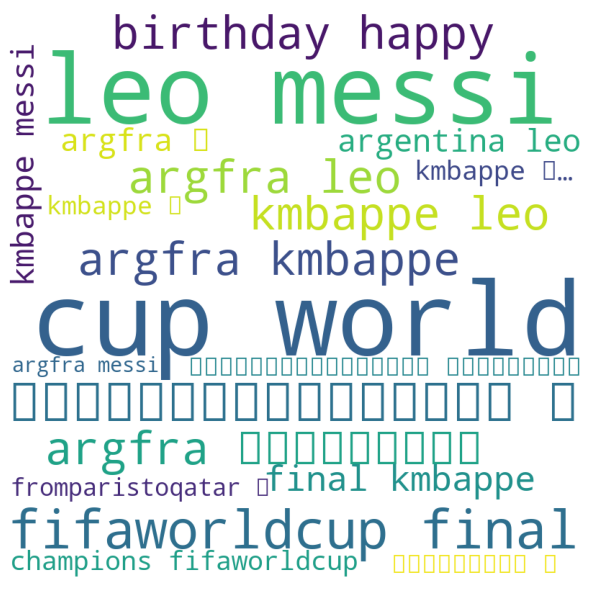

In [59]:
print_plt(wordcloud)

In [70]:
dataset["text"][0:10]

0    japans remote island rishiri selfpowered skier...
1    irelands peat bogs could key slow travel revol...
2                   mâchon breakfast made meat lovers 
3            sark archetypical english seaside escape 
4    dont blame berliners rude thats berliner schna...
5    hopewell culture created massive mysterious ea...
6    rediscovering america new series telling inspi...
7    bacalhau salt cod runs deep portugals culinary...
8    kibbutz lotan visitors learn sustainable livin...
9    meet nathalie quatrehomme undisputed queen che...
Name: text, dtype: object

In [42]:
dataset["text"]

0     japans remote island rishiri selfpowered skier...
1     irelands peat bogs could key slow travel revol...
2                    mâchon breakfast made meat lovers 
3             sark archetypical english seaside escape 
4     dont blame berliners rude thats berliner schna...
                            ...                        
85                 best beach accessories hitting sand 
86             prep plants vacation according experts  
87    iconic flight snack around since  still best t...
88    samantha brown reveals always travels duct tap...
89    took kids costa rican beach town heres perfect...
Name: text, Length: 90, dtype: object

In [ ]:
#result_df[(result_df["Item1"]=="cup")] # & (result_df["Item2"]=="escalope")]

In [5]:
import tenpy
import numpy as np
import matplotlib.pyplot as plt
from tenpy.models import lattice

In [6]:
MyLattice = lattice.Honeycomb
Lu = MyLattice.Lu  # = 2 = the number of sites in the unit cell
fig_args = dict(figsize=(7, 5), dpi=150)  # make figures a bit larger

In [7]:
lat = MyLattice(5, 4, sites=None, bc='periodic')


(-1.0, 5.550649519052838)

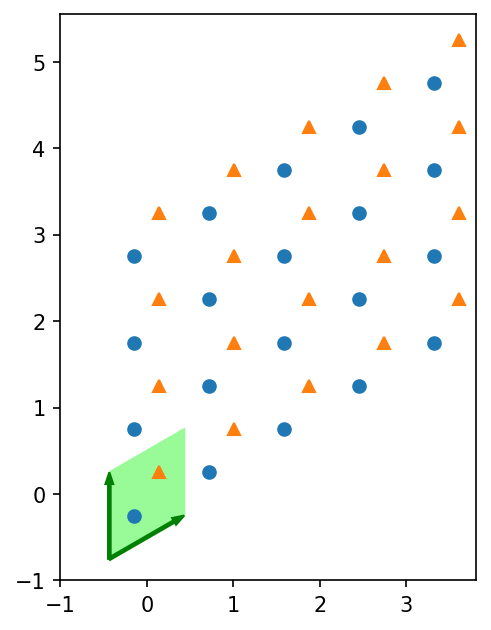

In [8]:
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
ax.set_aspect('equal')

lat.plot_basis(ax, origin=-0.5*(lat.basis[0] + lat.basis[1]))
ax.set_xlim(-1)
ax.set_ylim(-1)

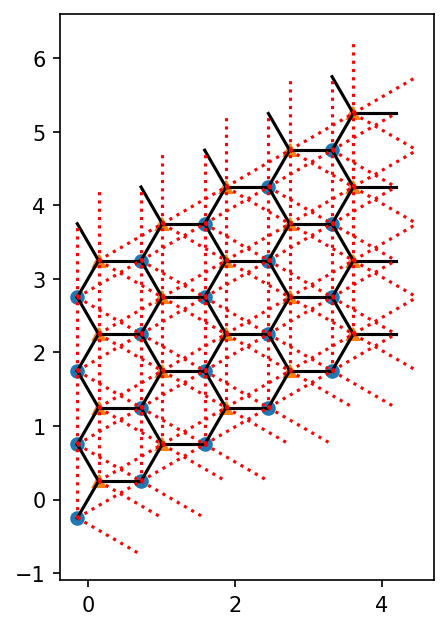

In [9]:
plt.figure(**fig_args)
ax = plt.gca()
lat.plot_sites(ax)
lat.plot_coupling(ax)
lat.plot_coupling(ax, lat.pairs['next_nearest_neighbors'], linestyle=':', color='r')
ax.set_aspect('equal')

In [9]:
%reload_ext line_profiler

In [10]:
def prof_function():
    x=10*20
    y=10+x
    return (y)

In [11]:
%lprun -f prof_function prof_function() #Total time and time per line

In [13]:
%timeit prof_function() #213 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


213 ns ± 13 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [14]:
%load_ext memory_profiler


The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


In [15]:
%memit prof_function() #peak memory: 62.09 MiB, increment: 0.00 MiB



peak memory: 62.09 MiB, increment: 0.00 MiB


In [38]:
%mprof prof_function()


SyntaxError: invalid syntax (Temp/ipykernel_8396/3973509830.py, line 1)

In [16]:
%mprun -f prof_function prof_function()


ERROR: Could not find file C:\Users\Semih\AppData\Local\Temp/ipykernel_8396/3043057708.py

